In [1]:
# Se comienza importando lo necesario
! pip install scikit-learn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Se genera el dataset pedido, fijando una "seed" para reproducibilidad.

In [2]:
# Semilla de la aleatoridad, de esta forma siempre que se vuelva a ejecutar el código se obtendrá el mismo dataset
np.random.seed(42)

presion_arterial = np.random.uniform(70, 180, 800) # 800 datos aleatorios para presión arterial entre 70 y 180
colesterol = np.random.uniform(120, 250, 800) # 800 datos aleatorios para colesterol entre 120 y 250
otro = np.random.uniform(0, 100, 800) # Otra variable aleatoria que simulará otros factores poco importantes

La probabilidad de tener problemas cardiovasculares vendrá determinada por la probabilidad de tener problemas de presión arterial o de colesterol (es decir, estar fuera de los valores normales).
Si la presión arterial es mayor que 120, el colesterol mayor que 180 y vamos a suponer que el otro factor inventado también influye de cierta manera.

In [ ]:
prob_riesgo = (presion_arterial - 120) / 40 + (colesterol - 180) / 40 + (otro / 100) / 2
# La presión arterial excesiva y el colesterol excesivo contribuyen mucho más que "otros" a la probabilidad. Aumentando los denominadores de 40 puede reducirse esta significancia.
prob_riesgo = np.clip(prob_riesgo, 0, 1) # No nos interesan realmente probabilidades mayores que el 100%, se cortan a 100%.

Si consideramos como umbral un 50% de probabilidades de tener problemas cardiovasculares entonces calculamos la probabilidad de cada instancia de la siguiente manera.

In [4]:
umbral = 0.5
riesgo = (prob_riesgo >= umbral).astype(int) # Creamos las clases, será 1 si tiene una probabilidad de riesgos cardiovasculares mayor que 0.5 y 0 si no.

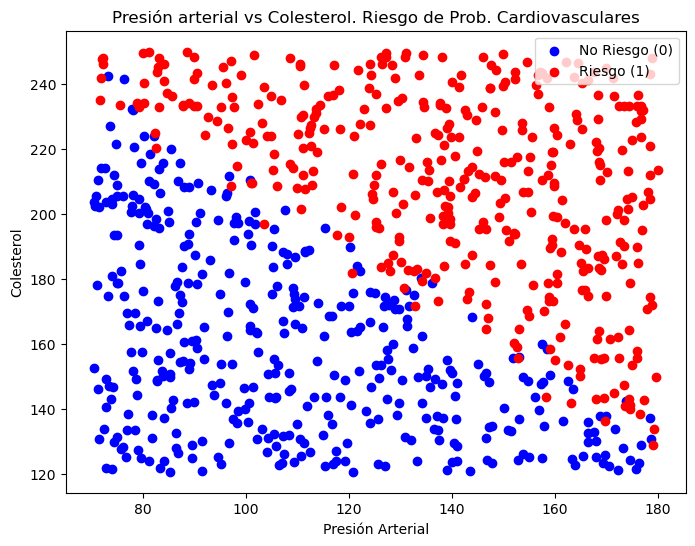

In [5]:
# Dibujamos para ver cómo han quedado los resultados. En el eje x la presión arterial, en el y el colesterol y cada punto coloreado en función de su clase.
plt.figure(figsize=(8, 6))
plt.scatter(presion_arterial[riesgo == 0], colesterol[riesgo == 0], color='blue', label='No Riesgo (0)')
plt.scatter(presion_arterial[riesgo == 1], colesterol[riesgo == 1], color='red', label='Riesgo (1)')
plt.xlabel('Presión Arterial')
plt.ylabel('Colesterol')
plt.legend()
plt.title("Presión arterial vs Colesterol. Riesgo de Prob. Cardiovasculares")
plt.show()

Los datos son coherentes, se necesita un valor mínimamente elevado por lo general de ambos factores para considerarse que el individuo tiene probabilidad de tener problemas cardiovasculares.

Para entrenar el modelo de regresión logística se tendría por un lado las variables de presión arterial y colesterol (X) y por otro el riesgo (y).


In [6]:
X = np.column_stack((presion_arterial, colesterol)) # Column stack nos ayuda a convertir los arrays unidimensionales en una mstriz 2D.
y = riesgo

# Entrenamos el modelo de Regresión Logística con los datos
regressor = LogisticRegression()
regressor.fit(X, y)

LogisticRegression()

Volvemos a dibujar, esta vez también con la curva de regresión.

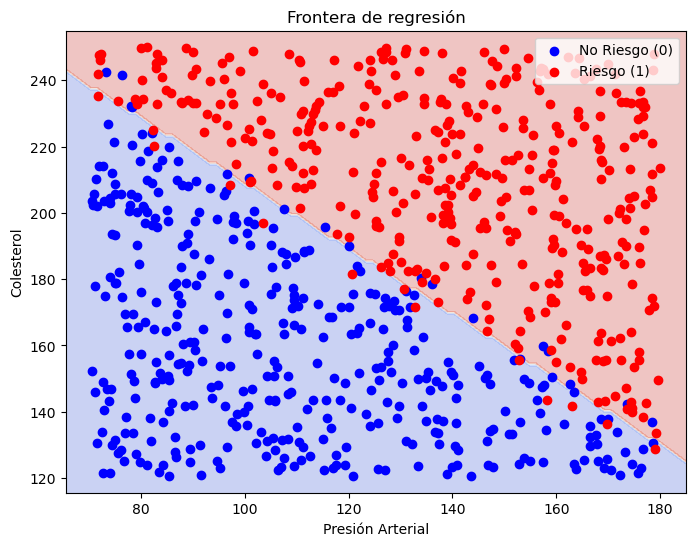

In [7]:
# Hacemos esto para visualizar mejor las áreas coloreadas.
x_min, x_max = X[:, 0].min() - 5, X[:, 0].max() + 5
y_min, y_max = X[:, 1].min() - 5, X[:, 1].max() + 5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

Z = regressor.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='No Riesgo (0)')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Riesgo (1)')
plt.xlabel('Presión Arterial')
plt.ylabel('Colesterol')
plt.legend()
plt.title("Frontera de regresión")
plt.show()

Hemos rellenado además los dos subconjuntos del dataset de color acorde a la clase tal y como los separa el modelo para hacernos mejor idea de la separación entre clases que solo con la curva. <br>
Es una separación muy buena y muy acorde a las clases reales. <br>
El modelo está muy bien ajustado y es capaz de detectar la relación entre las dos variables y la clase (exceptuando algunos pequeños outliers que podrían estar influidos por el factor "otro").

Por último, volvemos a generar un conjunto de datos para comparar.

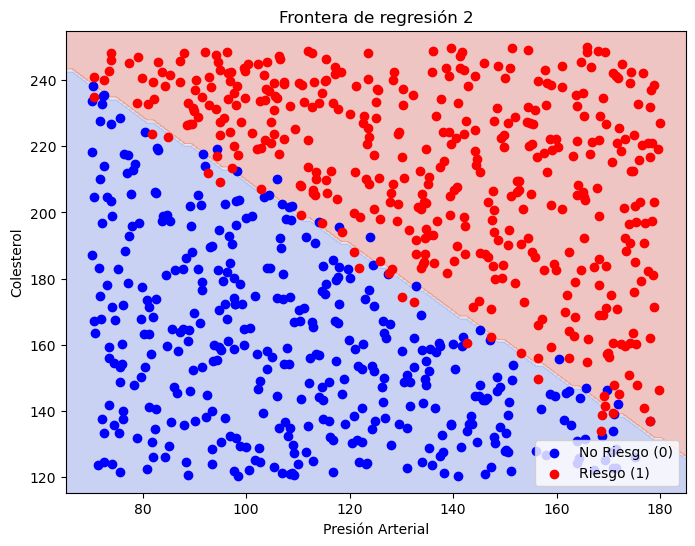

In [8]:
np.random.seed(50)

presion_arterial2 = np.random.uniform(70, 180, 800)
colesterol2 = np.random.uniform(120, 250, 800)
otro2 = np.random.uniform(0, 100, 800)

prob_riesgo2 = (presion_arterial2 - 120) / 40 + (colesterol2 - 180) / 40 + (otro2 / 100) / 2
prob_riesgo2 = np.clip(prob_riesgo2, 0, 1)
riesgo2 = (prob_riesgo2 >= umbral).astype(int)
X2 = np.column_stack((presion_arterial2, colesterol2))
y2 = riesgo2

regressor2 = LogisticRegression()
regressor2.fit(X2, y2)

x_min2, x_max2 = X2[:, 0].min() - 5, X2[:, 0].max() + 5
y_min2, y_max2 = X2[:, 1].min() - 5, X2[:, 1].max() + 5
xx2, yy2 = np.meshgrid(np.linspace(x_min2, x_max2, 100), np.linspace(y_min2, y_max2, 100))

Z2 = regressor2.predict(np.c_[xx2.ravel(), yy2.ravel()])
Z2 = Z2.reshape(xx2.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx2, yy2, Z2, alpha=0.3, cmap='coolwarm')
plt.scatter(X2[y2 == 0, 0], X2[y2 == 0, 1], color='blue', label='No Riesgo (0)')
plt.scatter(X2[y2 == 1, 0], X2[y2 == 1, 1], color='red', label='Riesgo (1)')
plt.xlabel('Presión Arterial')
plt.ylabel('Colesterol')
plt.legend()
plt.title("Frontera de regresión 2")
plt.show()

Este caso se ve que el modelo de regresión ha sido algo menos fino en la separación de las clases.